# Logistic Regression on Iris Dataset

This notebook demonstrates the application of Logistic Regression to classify Iris virginica flowers based on their petal width using the Iris dataset. The code includes detailed comments explaining each step of the process.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Load the iris dataset
iris = datasets.load_iris(as_frame=True)


In [2]:
# Check which Python environment is being used
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

Python executable: c:\Users\anton\anaconda3\envs\ml_fixed\python.exe
Python version: 3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:39:58) [MSC v.1943 64 bit (AMD64)]


In [3]:
# Preparing the data
# X: feature (petal width), y: target (whether the flower is Iris virginica or not)
X = iris.data[["petal width (cm)"]].values  # petal width
y = iris.target_names[iris.target] == 'virginica'  # 1 if Iris-Virginica, else 0

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:


# Creating and training the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:

# Preparing data for visualization
# Creating a range of petal widths for prediction
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
# Predicting probabilities for the range of petal widths
y_proba = log_reg.predict_proba(X_new)
# Finding the decision boundary (where probability = 0.5)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]


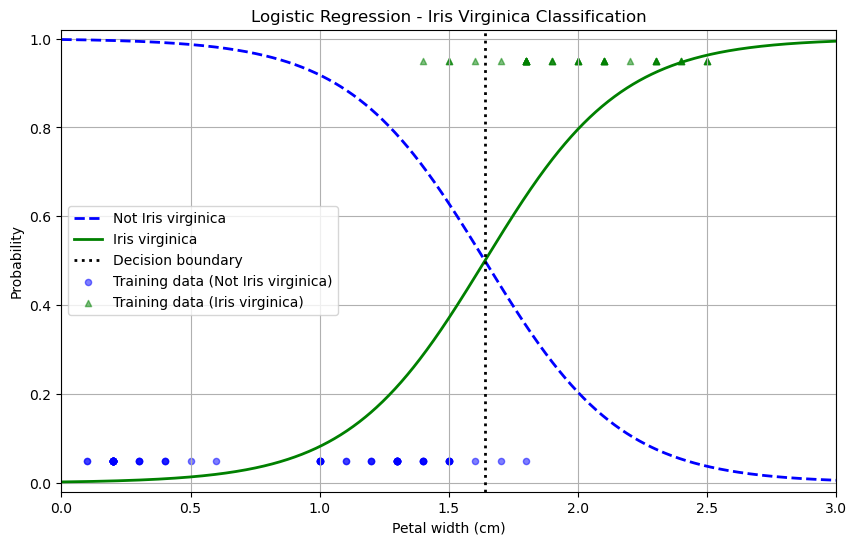

Model accuracy: 1.00


In [6]:

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting probability curves
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")

# Plotting the decision boundary
plt.axvline(x=decision_boundary, color='k', linestyle=':', linewidth=2, label="Decision boundary")

# Plotting the training data points
plt.scatter(X_train[y_train==0][:, 0], [0.05] * (y_train==0).sum(), color="b", marker="o", s=20, alpha=0.5, label="Training data (Not Iris virginica)")
plt.scatter(X_train[y_train==1][:, 0], [0.95] * (y_train==1).sum(), color="g", marker="^", s=20, alpha=0.5, label="Training data (Iris virginica)")

# Setting labels and legend
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")

# Setting axis limits and adding grid
plt.xlim(0, 3)
plt.ylim(-0.02, 1.02)
plt.grid(True)

# Adding a title
plt.title("Logistic Regression - Iris Virginica Classification")

# Displaying the plot
plt.show()

# Print model accuracy
print(f"Model accuracy: {log_reg.score(X_test, y_test):.2f}")


Model accuracy: 1.00


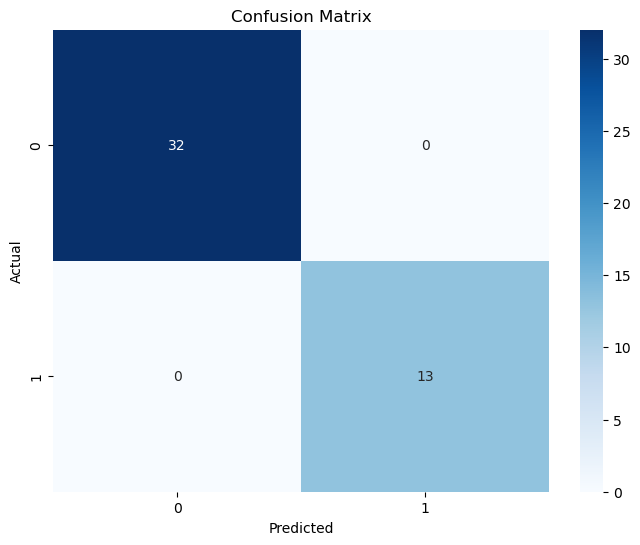

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        32
        True       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.86666667 1.        ]
Mean CV score: 0.95 (+/- 0.09)


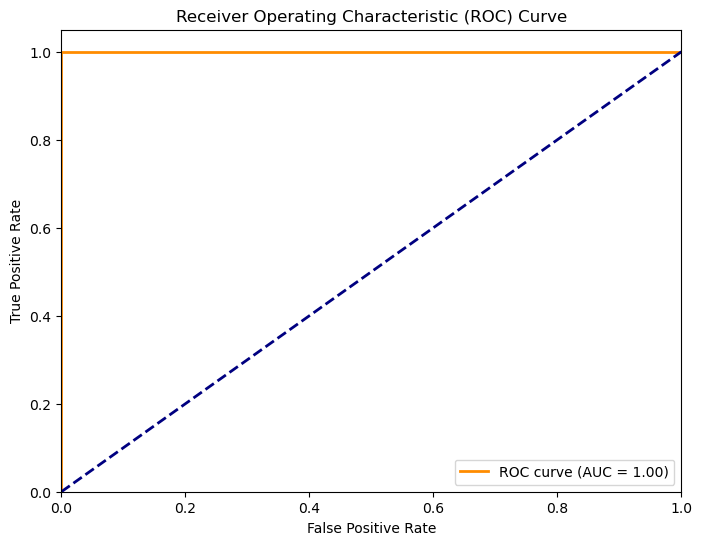

Model Coefficient: 3.7808
Model Intercept: -6.1982
The log-odds of a flower being Iris virginica increase by 3.7808 for each cm increase in petal width.
Odds Ratio: 43.8504
For each cm increase in petal width, the odds of a flower being Iris virginica are multiplied by 43.8504
Feature Importance: 3.7808


In [7]:
# Model Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# ROC Curve and AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Interpretation
coef = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]
print(f"Model Coefficient: {coef:.4f}")
print(f"Model Intercept: {intercept:.4f}")
print(f"The log-odds of a flower being Iris virginica increase by {coef:.4f} for each cm increase in petal width.")

# Odds ratio
odds_ratio = np.exp(coef)
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"For each cm increase in petal width, the odds of a flower being Iris virginica are multiplied by {odds_ratio:.4f}")

# Feature importance
feature_importance = abs(coef)
print(f"Feature Importance: {feature_importance:.4f}")
